

# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project i will be analyzing data associated to medical appontement no show. I am very interested to find out what may make a patient take an appointment and then no-show. as well as after I looked in details to the data, it is very clear to me, which made me excited to start working on it. 
<br><br>

**The data consists of 110527 medical appointments (Rows) and 14 column:**<br>

1. PatientId : unique id for each patient
2. AppointmentID: unique id for each appointment
3. Gender: male or female
4. DataMarcacaoConsulta: The day of the actuall appointment, when they have to visit the doctor.
5. DataAgendamento: The day someone called or registered the appointment, this is before appointment of course.
6. Age: How old is the patient.
7. Neighbourhood: Where the appointment takes place
8. Scholarship: True of False
9. Hipertension: True or False
10. Diabetes: True or False
11. Alcoholism: True or False
12. Handcap: True or False
13. SMS_received: 1 or more messages sent to the patient.
14. No-show: True or False.

<br>


### **The main targeted question:** <br>
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
<br><br>
### **Sub questions:** <br>

* Is the Gender or age affecting the patient to show or not?
* Is recieving SMS affect people to show?
* Is scholarship affect people to show?

<br><br>

**Reference:**
> * https://www.kaggle.com/joniarroba/noshowappointments



In [61]:

import numpy as np    
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
                                     
import seaborn as sn


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [11]:
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
data.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
data.shape

(110527, 14)

In [13]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### First the majority of them is between 18 and 55 years old <br>
#### Second i noticed that minimum age is in negative value(wrong data) and maximum age is 115 (above 110)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### No missing values

In [15]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

Target value --> No-show <br>
features --> other columns

In [16]:
data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [17]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [18]:
data['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [19]:
data['Scholarship'].unique()

array([0, 1])

In [20]:
data['Hipertension'].unique()

array([1, 0])

In [21]:
data['Diabetes'].unique()

array([0, 1])

In [22]:
data['Alcoholism'].unique()

array([0, 1])

In [23]:
data['Handcap'].unique()

array([0, 1, 2, 3, 4])

In [24]:
data['SMS_received'].unique()

array([0, 1])

In [25]:
data['No-show'].unique()

array(['No', 'Yes'], dtype=object)

**object (character values)** --> Gender , ScheduledDay, AppointmentDay , Neighbourhood, No-show <br>

**numerical columns** --> PatientId, AppointmentID, Age, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received <br>
<br>
<br>
<br>

### **categorical variables:** <br>
1. Gender
2. Neighbourhood
3. Scholarship
4. Hipertension
5. Diabetes
6. Alcoholism
7. Handcap
8. SMS_received
9. No-show



In [26]:
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No missing values

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [28]:
len(data[data['No-show'] == 'No'])

88208

#### **Of 110527 medical appointments only 88208 show in the appointment which means 79.8% showed**

In [29]:
len(data[data['No-show'] == 'Yes'])

22319

#### **Of all medical appointments only 22319  did not show  (which means 20.2%  did not showed)**

In [30]:
data['Gender'].value_counts(dropna=False)

F    71840
M    38687
Name: Gender, dtype: int64

In [31]:
data['Scholarship'].value_counts(dropna=False)

0    99666
1    10861
Name: Scholarship, dtype: int64

In [32]:
data['Hipertension'].value_counts(dropna=False)

0    88726
1    21801
Name: Hipertension, dtype: int64

In [33]:
data['Diabetes'].value_counts(dropna=False)

0    102584
1      7943
Name: Diabetes, dtype: int64

In [34]:
data['Handcap'].value_counts(dropna=False)

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [35]:
data['SMS_received'].value_counts(dropna=False)

0    75045
1    35482
Name: SMS_received, dtype: int64

In [36]:
# Check how many records with age < 0 and age > 100
data.query('Age < 0 | Age > 100').count()


PatientId         8
AppointmentID     8
Gender            8
ScheduledDay      8
AppointmentDay    8
Age               8
Neighbourhood     8
Scholarship       8
Hipertension      8
Diabetes          8
Alcoholism        8
Handcap           8
SMS_received      8
No-show           8
dtype: int64

In [37]:
#data[(data.Age > 100) & (data.Age < 0)].sum()


len(data[data['Age'] > 100])

7

In [38]:
len(data[data['Age'] < 0])

1

#### **7 patients are above 100 years and only one below 0, these patient  must be droped**


## Data Cleaning (Drop useless Rows and columns) 

**For data cleaning 2 things must be done: <br>
ages above 100 and below 0 must be dropped, as well as patientid and appointment id are useless(columns that i will not be using)**

In [39]:
#drop outliers ages above 100 and below 0
data.drop(data[(data.Age < 0) | (data.Age > 100)].index, inplace = True)

In [40]:
data.shape

(110519, 14)

In [41]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

data.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1 , inplace = True)

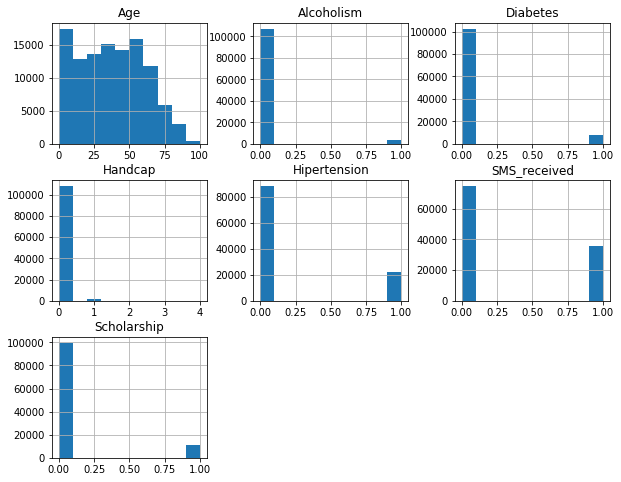

In [42]:
data.hist(figsize = (10,8));

### Notes from the histograms:
<br>
1. the majority of them is not alcoholism.<br>
2. the majority of them is not suffering from diabetes.<br>
3. more people suffers from hipertension than the others.<br>
4. Ages skewed to the left with the majority being around 25 and 75.<br>
5. nearly all of them dont have handicap.<br>
6. more people did not receive an SMS than people who received SMS.<br>
<br><br><br>

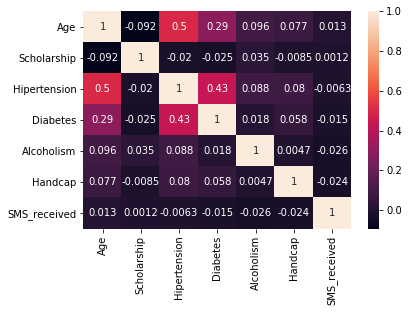

In [62]:
data = pd.DataFrame(data,columns=['Gender','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received'])

corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [43]:
data.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [44]:
data = data.rename(columns={data.columns[-1]: 'noshow'}) 

In [45]:
#data.columns.values[-1] = "no_show"

<a id='eda'></a>
## Exploratory Data Analysis


###  Is the Gender or age affecting the patient to show or not?

In [46]:
data.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,noshow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [47]:
data['noshow'].unique()

array(['No', 'Yes'], dtype=object)

In [48]:
no_show = data.noshow == 'Yes'
show = data.noshow == 'No'

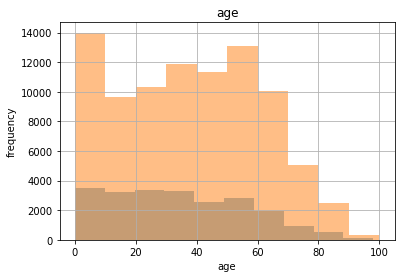

In [53]:

data.Age[no_show].hist(alpha=0.5,bins=10, label='No Show')
data.Age[show].hist(alpha=0.5,bins=10,label='Show')
#plt.legend();
    
plt.title("age")
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()

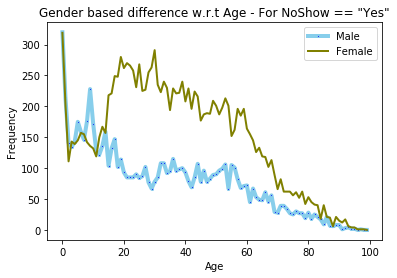

In [58]:

# Analysing the distribution among genders with their age whose status for NoShow is "Yes"
# i.e, they are NOT coming for the appointment.
range_df = pd.DataFrame()
range_df['Age'] = range(100) # Setting up for the age limit of 100 only
Male = range_df.Age.apply(lambda x:len(data[(data.Age == x) & (data.Gender == 'M') & (data.noshow == 'Yes')]))
Female = range_df.Age.apply(lambda x:len(data[(data.Age == x) & (data.Gender == 'F') & (data.noshow == 'Yes')]))

# multiple line plot
plt.plot( range_df, Male, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=4)
plt.plot( range_df, Female, marker='', color='olive', linewidth=2)
plt.legend(['Male','Female'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Gender based difference w.r.t Age - For NoShow == "Yes"');

#### Age is correlated with people who show in the appointment
#### Young patients have show in the appointment more than old patients <br><br><br><br><br><br>

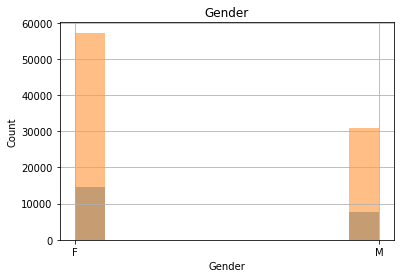

In [51]:
data.Gender[no_show].hist(alpha=0.5,bins=10, label='No Show')
data.Gender[show].hist(alpha=0.5,bins=10,label='Show')
#plt.legend();
plt.title("Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

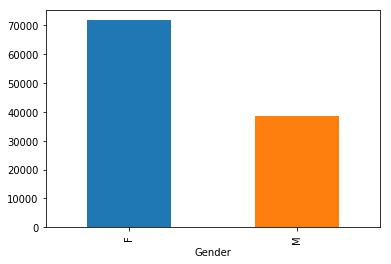

In [52]:
#data.groupby('Gender').noshow.mean()
data.groupby("Gender")["noshow"].count().plot(kind='bar');

#### Females show more in the medical appointment than males <br><br><br><br><br><br><br><br>

###  Is recieving SMS affect people to show?

In [67]:
def mean():
    data.SMS_received[show].mean()

In [42]:
data.SMS_received[no_show].mean()

0.43842982613371573

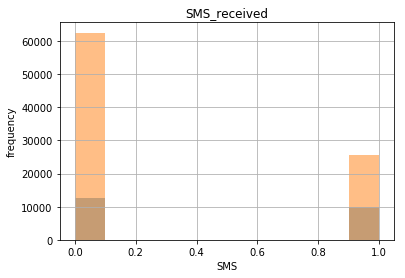

In [55]:
data.SMS_received[no_show].hist(alpha=0.5,bins=10, label='No Show')
data.SMS_received[show].hist(alpha=0.5,bins=10,label='Show')
#plt.legend();
plt.title("SMS_received")
plt.xlabel("SMS")
plt.ylabel("frequency")
plt.show()

#### people who show to the appointment had higher SMS recieved than people who didnt <br><br><br><br><br><br>

### Is scholarship affect people to show?

In [ ]:
data.Scholarship[show].mean()

In [56]:
data.Scholarship[no_show].mean()

0.11552249507080121

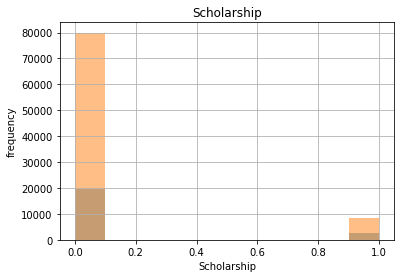

In [56]:
data.Scholarship[no_show].hist(alpha=0.5,bins=10, label='No Show')
data.Scholarship[show].hist(alpha=0.5,bins=10,label='Show')
#plt.legend();
plt.title("Scholarship")
plt.xlabel("Scholarship")
plt.ylabel("frequency")
plt.show()

#### From this histogram it is clear that people who got scholarships did NOT show to the appointment.  <br><br><br><br><br><br>

<a id='conclusions'></a>
## Conclusions

using Medical Appointment No Shows i was able to do some analysis on the data, i found out from all features that :<br>
1. the majority of them is not alcoholism.<br>
2. the majority of them is not suffering from diabetes.<br>
3. more people suffers from hipertension than the others.<br>
4. Ages skewed to the left with the majority being around 25 and 75.<br>
5. nearly all of them dont have handicap.<br>
6. more people did not receive an SMS than people who received SMS.<br>

Age is correlated with people who show in the appointment, Young patients have show in the appointment more than old patients <br> Females show more in the medical appointment than males <br> people who show to the appointment had higher SMS recieved than people who didnt<br>people who got scholarships did NOT show to the appointment. <br>

limitations: I didnot do analysis arround ScheduledDay and appointment day, and they may be effective in understanding the behaviour of the patients.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [175]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0